In [5]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [6]:
%matplotlib inline

In [7]:
data = pd.read_csv('../data/raw/acquisition_train.csv')

In [8]:
# clean up and split the lat_lon feature
re_remove = re.compile('[\(),]')
data.lat_lon = data.lat_lon.str.replace(re_remove, '')
data['latitude'], data['longitude'] = data.lat_lon.str.split(' ').str
data[['latitude', 'longitude']] = data[['latitude', 'longitude']].astype(np.number)

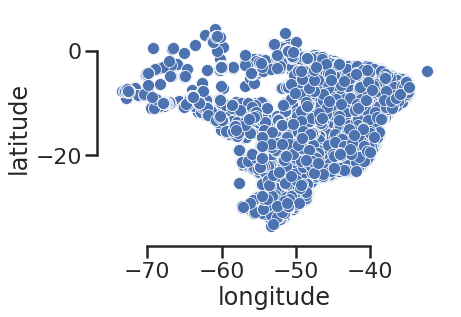

In [9]:
sns.set(style="ticks")
sns.set_context("poster")
sns.scatterplot(x='longitude', y='latitude', data=data, palette='PRGn')
sns.despine(offset=10, trim=True)

In [10]:
import reverse_geocoder as rg

In [11]:
# coordinates = data.loc[1,['latitude', 'longitude']].values
coordinates = data.loc[1,'lat_lon']

In [12]:
latlon_indexes = data[data.lat_lon.notna()].index
tuple_latlon_list = [(x, y) for x, y in data.loc[latlon_indexes,['latitude', 'longitude']].values]

In [10]:
df = data[['latitude', 'longitude']].copy()
notna_idx = df.notna().any(axis=1)

In [29]:
search_list = list(map(tuple, df[notna_idx].values))
coords_info = rg.search(search_list)

In [ ]:
city_state_list = [[*x.values()][2:4] for x in coords_info]

In [41]:
[[*x.values()] for x in coords_info]

SyntaxError: starred assignment target must be in a list or tuple (<ipython-input-41-299079765fa0>, line 1)

In [ ]:
lalo = data[['latitude', 'longitude']].copy()

In [43]:
pd.DataFrame.from_dict(coords_info)

,lat,lon,name,admin1,admin2,cc
0,-29.16806,-51.17944,Caxias do Sul,Rio Grande do Sul,Caxias Do Sul,BR
1,-19.74833,-47.93194,Uberaba,Minas Gerais,Uberaba,BR
2,-28.84556,-51.89028,Guapore,Rio Grande do Sul,Guapore,BR
3,-17.37389,-40.22056,Medeiros Neto,Bahia,Medeiros Neto,BR
4,-16.58564,-39.78189,Guaratinga,Bahia,Itabela,BR
5,-6.80306,-35.08056,Rio Tinto,Paraiba,Rio Tinto,BR
6,-22.90556,-47.06083,Campinas,Sao Paulo,Campinas,BR
7,-7.5325,-46.03556,Balsas,Maranhao,Balsas,BR
8,-21.03306,-44.75806,Bom Sucesso,Minas Gerais,Bom Sucesso,BR
9,-16.67861,-49.25389,Goiania,Goias,Goiania,BR


In [ ]:
list(zip(list(lalo.values)))

In [ ]:
list(zip(list(data.latitude.values), list(data.longitude.values)))

In [34]:
city_state_list

SyntaxError: can't use starred expression here (<ipython-input-34-b8266208733f>, line 1)

In [30]:
city_state_list = [[*x.values()][2:4] for x in coords_info]

In [ ]:
city_state_df = pd.DataFrame(city_state_list, columns=['city', 'state'])

In [ ]:
city_state_df.city.value_counts()

In [ ]:
data.state.value_counts()

In [ ]:
data['city'] = 

In [ ]:
rg.search((-23.946096014998382, -46.34033203125001))

In [ ]:

latlon_search[1]

In [ ]:
list(a.values())[2:4]